# Part I: Research Question
## A.  Describe the purpose of this data mining report by doing the following:
### 1.  Propose one question relevant to a real-world organizational situation that you will answer using one of the following clustering techniques:
    •  k-means
    •  hierarchical

A critical tool in understanding a large audience or market is the ability to subdivide that market into smaller groups of customers who share similar characteristics. By grouping a larger market into smaller segments, decision-makers and analysts can begin to explore what specific traits tend to lead to more profitable customers or determine which customer segments see lower retention rates.

Understanding how these groups differ and how they trend towards retention and profitability means stakeholders can appropriately allocate resources more efficiently.

For example, suppose rural customers churn higher than urban customers. In that case, stakeholders know that they can focus retention efforts on their rural markets to improve retention. Any money spent in urban markets would be a waste, as those customers already have a lower churn rate.

However, when categories are not easily defined, applying unsupervised learning to a customer data set can help identify clusters of customers within a data set that may share similar traits. These clusters may not fit into an already defined categorical variable (male vs female, rural vs urban, married vs divorced, etc.).

The use of k-means clustering can help identify customer groups within a dataset based on continuous variables that can then be explored more thoroughly for traits that will help drive effective and cost-efficient decisions from stakeholders.
With the given data set of customer churn from this telecommunications company, can k-means clustering identify subgroups of customers based on their service profile? 

### 2.  Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.

This analysis aims to apply k-means clustering to customer data based on their customer service profile to identify groups within the dataset for further analysis. A customer’s service profile includes continuous variables about their services, interruptions to those services, the customer support they receive, and their tenure with the company. Those variables include:

- **Bandwidth_GB_Year** – A measurement of the average amount of data a customer uses in a year measured in GB.
- **MonthlyCharge** – The average monthly amount a customer is charged for their services.
- **Outage_sec_perweek** -  A measurement of system outages in a customer’s neighborhood, measured as an average in seconds per week.
- **Yearly_equip_failure** – The number of times a customer’s equipment has to be reset or replaced.
- **Email** – The number of e-mails a customer was sent in the last year.
- **Contacts** – The number of times a customer contacted technical support.
- **Tenure** – How long the customer has been with the company, measured in months.

# Part II: Technique Justification
## B.  Explain the reasons for your chosen clustering technique from part A1 by doing the following:
### 1.  Explain how the clustering technique you chose analyzes the selected dataset. Include expected outcomes.

K-means clustering works to identify subgroups of data points within a dataset based on continuous variables into a set number, k, of clusters or groups. Each data point can only belong to one group, and each group is optimized so that the squared distance between each data point and the center of the cluster is as small as possible. 

After running a k-means analysis, a set number of data clusters that are distinct from each other will be identified, with as little variation as possible.

### 2.  Summarize one assumption of the clustering technique.

One assumption of the k-means clustering analysis is that the variables are distributed symmetrically and not skewed with large groups of variables near the minimum or maximum values.

### 3.  List the packages or libraries you have chosen for Python or R, and justify how each item on the list supports the analysis.

For this analysis, I am using Python in a Jupyter Notebook. Python is an ideal language for running analysis on datasets due to a robust availability of packages and libraries specifically for simple mathematical functions to advanced machine learning models.
For this analysis, I have utilized the following packages:
- **Numpy**: For performing mathematical functions
- **Pandas**: A library designed for working with and manipulating data structures.
- **Matplotlib**: A library useful for visualizing and plotting data.
- **Seaborn**: Another library with data visualization and plotting functionality
- **Sklearn**: A robust library of machine learning packages suited for preparing data for mining and performing various machine learning tasks. For this analysis, the following packages have been selected
    - **Kmeans**: A package for performing the k-means clustering analysis on the selected data.
    - **StandardScaler**: A package helpful in preparing data for clustering analysis by standardizing data used in clustering analysis.
    - **Silhouette_score**: A package used to determine the accuracy of a clustering analysis

# Part III: Data Preparation
## C.  Perform data preparation for the chosen dataset by doing the following
### 1.  Describe one data preprocessing goal relevant to the clustering technique from part A1.

Since the selected variables for this analysis vary in scale and distribution, it is best to standardize the data chosen for clustering. Before performing the k-means clustering operation, StandardScaler from Sklearn will be used to standardize the data, and then  

### 2.  Identify the initial dataset variables that you will use to perform the analysis for the clustering question from part A1, and label each as continuous or categorical.

The selected variables for this analysis include:
- **Bandwidth_GB_Year** - continuous
- **MonthlyCharge** - continuous
- **Outage_sec_perweek** - continuous
- **Yearly_equip_failure** - continuous
- **Email** - continuous
- **Contacts** - continuous
- **Tenure** - continuous

### 3.  Explain each of the steps used to prepare the data for the analysis. Identify the code segment for each step.

A preliminary exploration and cleaning are necessary to prepare the data for clustering analysis.

First, an import of necessary libraries and packages is needed and create a pandas dataframe from the supplied churn dataset.

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

%matplotlib inline

In [233]:
df = pd.read_csv('churn_clean.csv')

Next, an examination of the dataset is necessary to determine any null or missing values and any misaligned data types.

Additionally, unnecessary variables can be identified.

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [235]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082813,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


Column names for the survey response variables are not very descriptive and will be renamed to make them easier to identify.

In [236]:
df.rename(columns ={'Item1' : 'sv_timely_resp',
                    'Item2' : 'sv_timely_fixes',
                    'Item3' : 'sv_timely_repl',
                    'Item4' : 'sv_reliablility',
                    'Item5' : 'sv_options',
                    'Item6' : 'sv_respectful',
                    'Item7' : 'sv_courteous',
                    'Item8' : 'sv_act_listen'}, inplace=True)

A list of 'object' typed variables is made for easier reference during exploration

In [237]:
dt_obj = df.select_dtypes(include=[np.object]).columns.tolist()
dt_obj

['Customer_id',
 'Interaction',
 'UID',
 'City',
 'State',
 'County',
 'Area',
 'TimeZone',
 'Job',
 'Marital',
 'Gender',
 'Churn',
 'Techie',
 'Contract',
 'Port_modem',
 'Tablet',
 'InternetService',
 'Phone',
 'Multiple',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'PaymentMethod']

Since this analysis relies on continuous variables, a dataset of the integer and float variables is created for exploration.

In [238]:
cont = df.drop(columns = dt_obj)
cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Zip                   10000 non-null  int64  
 2   Lat                   10000 non-null  float64
 3   Lng                   10000 non-null  float64
 4   Population            10000 non-null  int64  
 5   Children              10000 non-null  int64  
 6   Age                   10000 non-null  int64  
 7   Income                10000 non-null  float64
 8   Outage_sec_perweek    10000 non-null  float64
 9   Email                 10000 non-null  int64  
 10  Contacts              10000 non-null  int64  
 11  Yearly_equip_failure  10000 non-null  int64  
 12  Tenure                10000 non-null  float64
 13  MonthlyCharge         10000 non-null  float64
 14  Bandwidth_GB_Year     10000 non-null  float64
 15  sv_timely_resp      

Though the variables selected for analysis are identified in Part 1, examining all continuous variables, and their distributions helps confirm the use of the service variables.

In [239]:
surv_res = cont[['sv_timely_resp','sv_timely_fixes','sv_timely_repl',
                    'sv_reliablility','sv_options','sv_respectful',
                    'sv_courteous','sv_act_listen']]
surv_res.describe()

,sv_timely_resp,sv_timely_fixes,sv_timely_repl,sv_reliablility,sv_options,sv_respectful,sv_courteous,sv_act_listen
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


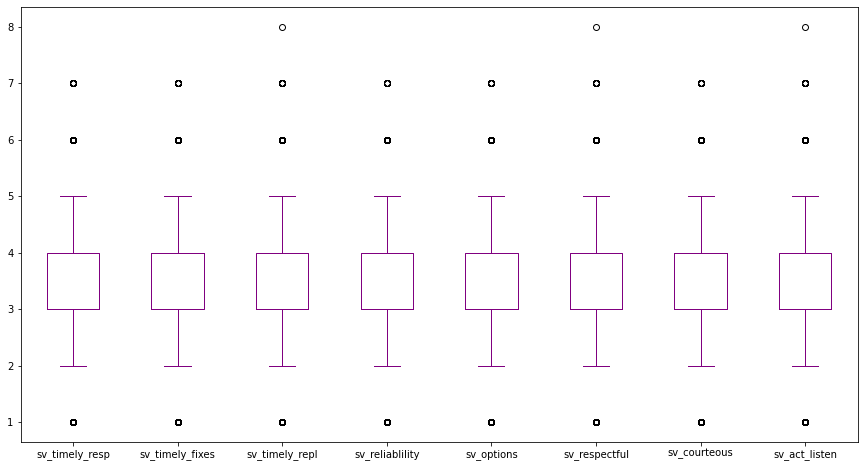

In [240]:
color = 'purple'

surv_res.boxplot(grid=False, figsize=(15,8), color=color);

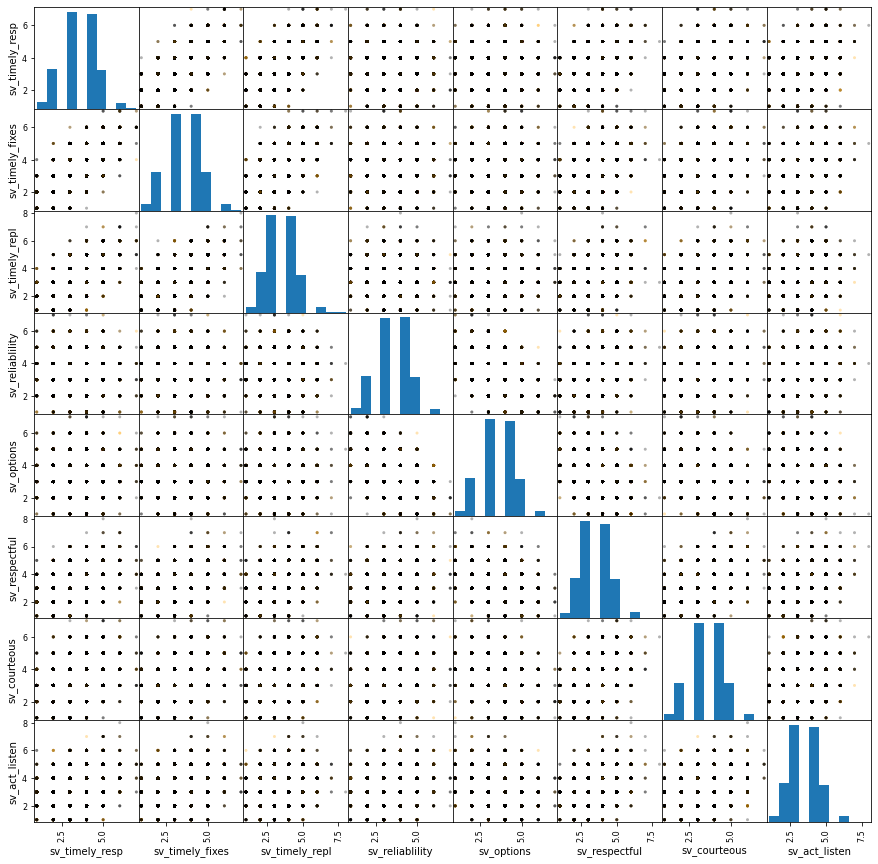

In [241]:
surv_cols = surv_res.columns.tolist()
surv_cols.append('Churn')
surv_df = df[surv_cols]

colors = {'Yes':'Orange', 'No':'Black'}

x = pd.plotting.scatter_matrix(surv_df, figsize = [15,15], alpha=.3, c= surv_df['Churn'].map(colors))

In [242]:
cont.drop(columns=surv_res).columns.tolist()

['CaseOrder',
 'Zip',
 'Lat',
 'Lng',
 'Population',
 'Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year']

In [243]:
demo = cont[[ 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age', 'Income']]
demo.describe()

,Zip,Lat,Lng,Population,Children,Age,Income
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000
mean,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771
std,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702
min,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000
25%,26292.500000,35.341828,-97.082813,738.000000,0.0000,35.000000,19224.717500
50%,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000
75%,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000
max,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000


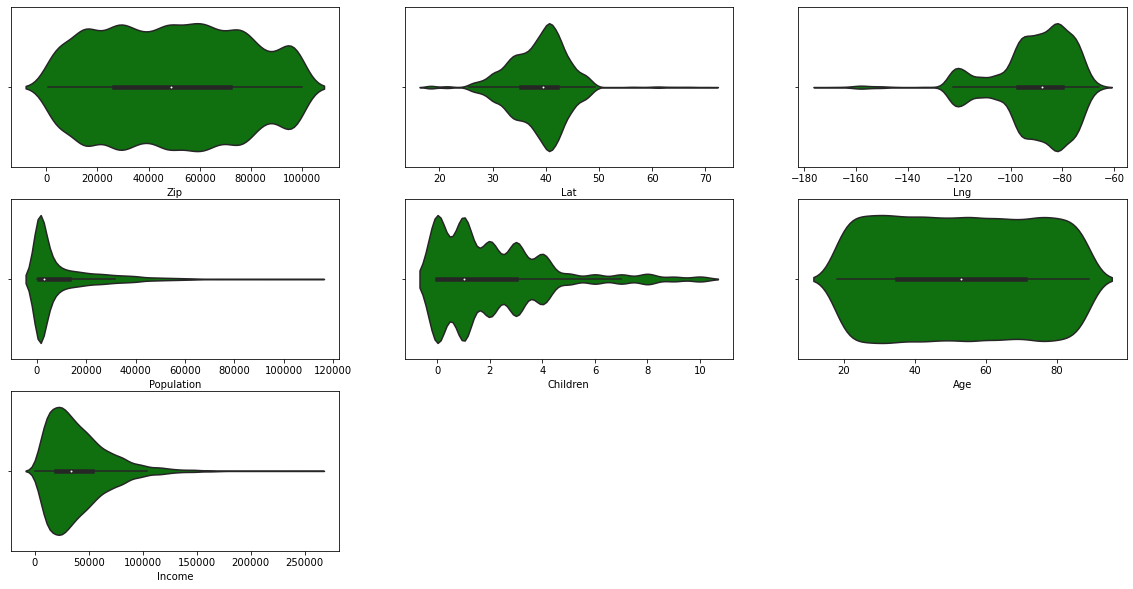

In [244]:
plt.figure(figsize=(20,10))

i=1

for col in demo.columns.tolist():
    plt.subplot(3,3,i)
    sns.violinplot(x=df[col], color='green')
    i+=1

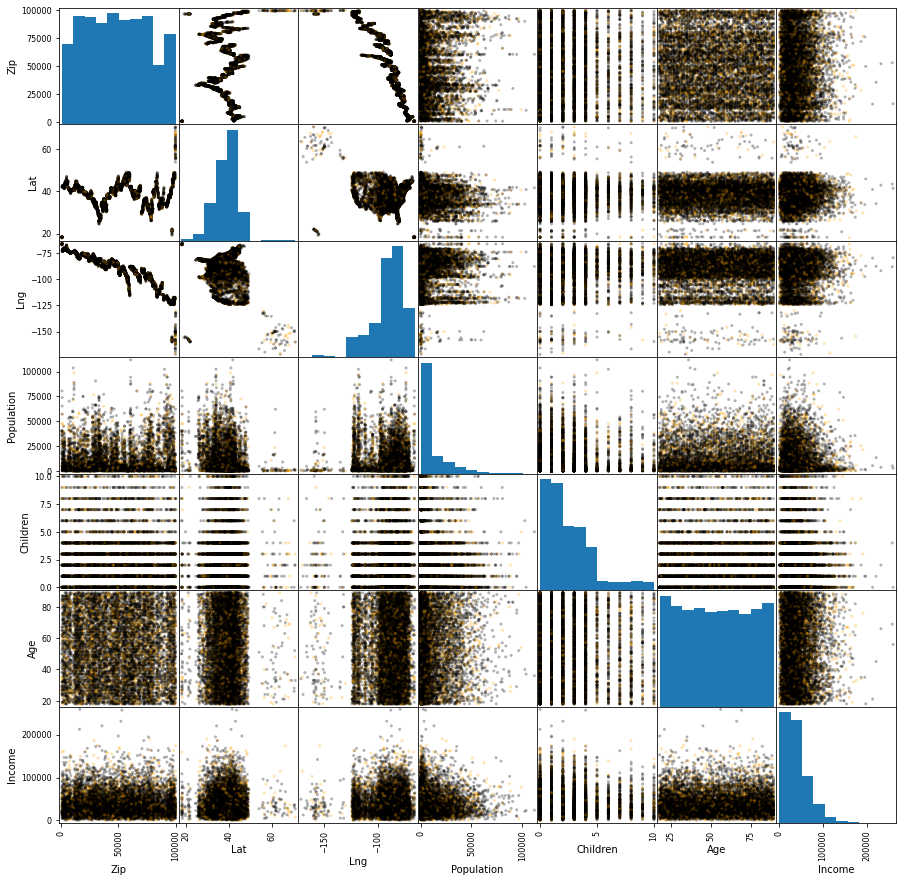

In [245]:
demo_cols = demo.columns.tolist()
demo_cols.append('Churn')
demo_df = df[demo_cols]

x = pd.plotting.scatter_matrix(demo_df, figsize = [15,15], alpha=.3, c= demo_df['Churn'].map(colors));

In [246]:
demo.columns.tolist() + surv_res.columns.tolist() + ['CaseOrder']

['Zip',
 'Lat',
 'Lng',
 'Population',
 'Children',
 'Age',
 'Income',
 'sv_timely_resp',
 'sv_timely_fixes',
 'sv_timely_repl',
 'sv_reliablility',
 'sv_options',
 'sv_respectful',
 'sv_courteous',
 'sv_act_listen',
 'CaseOrder']

In [247]:
service = cont.drop(columns=(demo.columns.tolist() + surv_res.columns.tolist() + ['CaseOrder']))
service.describe()

,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369
max,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


In [248]:
service.head()

,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,7.978323,10,0,1,6.795513,172.455519,904.536110
1,11.699080,12,0,1,1.156681,242.632554,800.982766
2,10.752800,9,0,1,15.754144,159.947583,2054.706961
3,14.913540,15,2,0,17.087227,119.956840,2164.579412
4,8.147417,16,2,1,1.670972,149.948316,271.493436


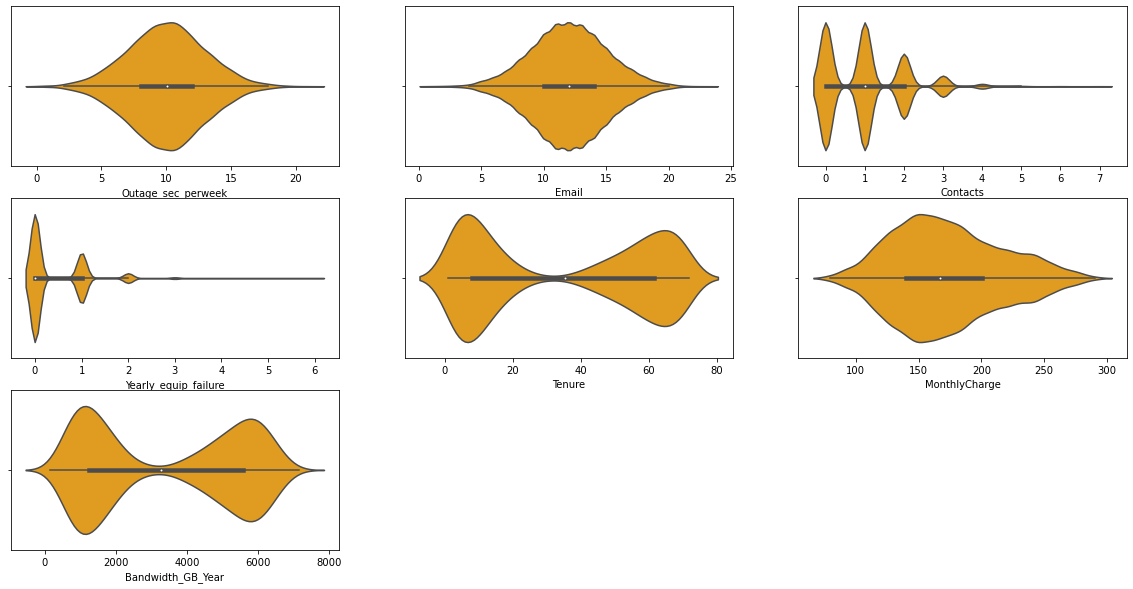

In [249]:
plt.figure(figsize=(20,10))

i=1

for col in service.columns.tolist():
    plt.subplot(3,3,i)
    sns.violinplot(x=df[col], color='orange')
    i+=1

In [250]:
serv_cols = ['Outage_sec_perweek', 'Bandwidth_GB_Year', 'Tenure', 'MonthlyCharge',
             'Email', 'Contacts', 'Yearly_equip_failure', 'Churn']

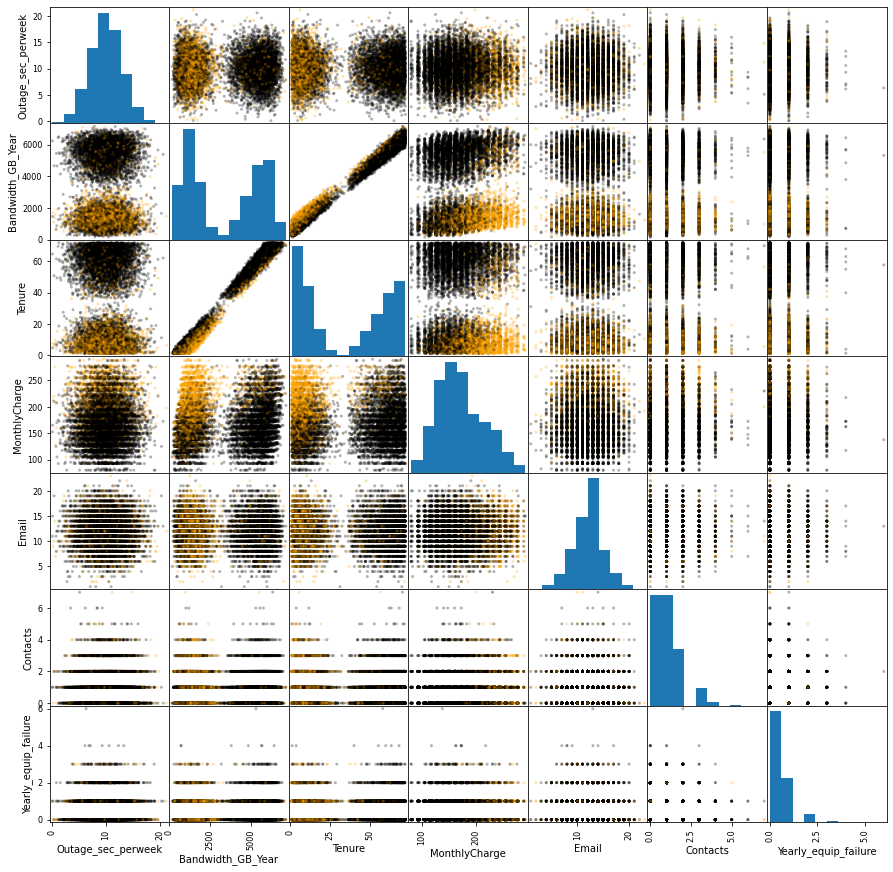

In [251]:
service = df[serv_cols]
colors = {'Yes':'Orange', 'No':'Black'}

pd.plotting.scatter_matrix(service, figsize = [15,15], alpha=.3, c=service['Churn'].map(colors));

The variables selected in part 1 can now be prepared first by creating a numpy array of values for just those columns.

In [252]:
data = service.drop(columns = 'Churn').to_numpy()

In [253]:
data.shape

(10000, 7)

Next, the array needs to be standardized using Sklearn's StandardScaler package

In [254]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data);

In [255]:
data_scaled.shape

(10000, 7)

An elbow graph is created of various numbers of clusters, the k number, and their inertia values to determine the optimal number of clusters for analysis.

Inertia is essential in determining the variance and cohesion within the clusters created in a k-means analysis. It is a sum of the squared distance of all data points to the cluster's center, or centroid. A low inertia value means a cluster is compact and ideal for a k-means analysis.

An elbow graph visualizes the inertia values for multiple k-means analysis with varying numbers of clusters. It aids in helping to select the lowest number of clusters for analysis while still maintaining a low inertia value.

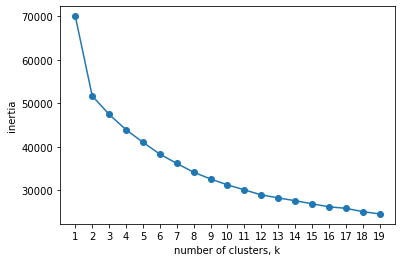

In [256]:
ks = range(1, 20)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(data_scaled)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [257]:
inertias

[70000.00000000017,
 51707.328412953975,
 47456.81012644556,
 43946.7649013935,
 41052.15608482175,
 38322.35275641964,
 36198.97340786437,
 34174.45651594097,
 32624.29067700569,
 31266.069385163883,
 30112.328267820456,
 28977.040904778645,
 28273.274712182716,
 27630.572688258882,
 26928.858888995837,
 26230.233649803373,
 25884.32787550076,
 25120.52649255075,
 24596.132705687618]

In [258]:
i_s = range(0, len(inertias)-1)

for i in i_s:
    print(inertias[i]- inertias[i+1])

18292.6715870462
4250.518286508413
3510.045225052061
2894.608816571752
2729.8033284021076
2123.379348555274
2024.5168919233984
1550.1658389352779
1358.2212918418081
1153.7411173434266
1135.2873630418107
703.7661925959292
642.7020239238336
701.7137992630451
698.6252391924645
345.9057743026133
763.8013829500087
524.3937868631328


Two or more clusters seem to be ideal as the elbow in the graph appears at the 2 cluster point. Dropping from 1 to 2 clusters resulted in a change in inertia value of 18,292.67. Adding more clusters did not significantly change the inertia value by more than 4,250 and did not provide any significant drop in inertia to justify using more.

### 4.  Provide a copy of the cleaned dataset.

In [266]:
service.to_csv("selected_variables_D212_Task1.csv")
pd.DataFrame(data_scaled).to_csv("clustered_data_D212_Task1.csv")

## D.  Perform the data analysis and report on the results by doing the following:
### 1.  Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.

#### The K-means Cluster Analysis

In [260]:
data_scaled.shape

(10000, 7)

To run the k-means analysis a model will be defined using the KMeans package from sklearn with the number of clusters to the optimal number from the elbow graph, 2.

The model is then run with the array of the chosen variables stored as “data_scaled” fit to the model.

Finally, fit_predict is run on the dataset to apply labels to the clusters, storing them as “labels.”

In [261]:
model = KMeans(n_clusters=2)
model.fit(data_scaled)
labels = model.fit_predict(data_scaled)

In [262]:
print(data_scaled.shape)
print(labels)

(10000, 7)
[0 0 0 ... 1 1 1]


In [263]:
print('The k-means clustering analysis was performed on',model.n_features_in_,'features')
print('There are', len(set(labels)), 'clusters after running the analysis')
print('The cluster Labels are: ', set(labels))
print('Labels have been applied to:',len(labels), 'observations')
print('The inertia value for the k-means analysis is',model.inertia_)

The k-means clustering analysis was performed on 7 features
There are 2 clusters after running the analysis
The cluster Labels are:  {0, 1}
Labels have been applied to: 10000 observations
The inertia value for the k-means analysis is 51707.325716786865


### 2.  Provide the code used to perform the clustering analysis technique from part 2.

In [264]:
model = KMeans(n_clusters=2)
model.fit(data_scaled)
labels = model.fit_predict(data_scaled)

# Part V: Data Summary and Implications
## E.  Summarize your data analysis by doing the following:
### 1.  Explain the accuracy of your clustering technique.

There are two methods for evaluating the accuracy of a clustering model. The first is by examing the inertia values for the number of clusters to determine the appropriate n_cluster value that returns a cluster analysis with the lowest number of clusters possible with a low inertia value.

The elbow graph plotted at the end of Part 3C question 3 shows that k-means clustering using 2 clusters results in the fewest number of clusters with a low inertia value. Adding more clusters to the analysis does not create a drastic enough change in the inertia values for more clusters to be necessary and accurate.

The next method for evaluating the accuracy of a clustering technique is a silhouette analysis using sklearn’s silhouette_score function.

A silhouette analysis examines the separation between clusters to determine how cohesive clusters are. A distinct cluster with very few points overlapping other clusters is ideal, whereas clusters of points that are spread out and overlapping with other clusters should be avoided.

#### Silhouette analysis 
$$\displaystyle \frac{b^{i} - a^{i}}{max(a^{i},b^{i}}$$

This analysis compiles a score that is the coefficient of:
$a^{i}$ the mean of all distances between data points in one cluster and 
$b^{i}$ the mean of all distances in the closest cluster

The analysis should return a score between -1 and 1. A score of 0 means too many data points overlap with other clusters and indicates poor cohesion and less distinct clusters. A score near -1 means too many data points are assigned to the wrong clusters entirely.

A score of 1 is ideal as the coefficient calculated would indicate that the clusters are dense and separated from each other. A silhouette score closer to 1 means the clustering of the analysis is more accurate and reliable as a means of clustering the dataset.


#### The Silhouette Score for the cluster analysis

In [265]:
score = silhouette_score(data, model.labels_, metric='euclidean')

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.806


The silhouette score for this analysis is 0.806. This score indicates little overlap between the clusters, and they are dense and well separated.

### 2.  Discuss the results and implications of your clustering analysis.

This k-means clustering analysis created two subgroups within the dataset based on their service profile and unsupervised modeling of the continuous variables selected in Part 1A. This dataset has two distinct clusters based on the graphed inertia values and the silhouette analysis.

While these clusters do not correspond to known categorical variables, they are a way to segment the telecom company's customers for further analysis. Understanding these groups and what traits within each correspond to desirable outcomes for the company, including reduced churn and profitability, can be vital in developing strategies for customer retention, marketing, customer support, etc.

For example, suppose customers in one cluster group sign up for more services and create more profit for the company than customers in the other cluster. In that case, decision-makers can work to develop strategies to recruit and retain more customers that would fit within that first cluster.

### 3.  Discuss one limitation of your data analysis.
One major limitation of this analysis is that k-means clustering requires a “k” value for the initial number of clusters chosen by the analyst, which can be subjective.

A better number of clusters can be determined by creating an elbow graph of inertia values, but it may not always work.

### 4.  Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.

This clustering analysis has created two distinct sub-groups within the customer dataset. Analyzing these two groups further should provide insight and actionable strategies for achieving company goals more efficiently.

The telecom company has stated that predicting which customers are at high risk of churn is necessary for achieving its goal of retaining highly profitable customers. 

With the results of this analysis, two distinct groups in the dataset are now apparent based on the labels applied in the k-means analysis for each cluster. It is my recommendation that further analysis be conducted between these two groups to identify:
1.	The difference in churn rate between the two groups
2.	Any underlying causes for why one group might have a higher churn rate than the other

With a deeper understanding of the differences between these two groups and their churn rate, decision-makers can develop strategies for lowering the churn rate in a much smaller group rather than the entire customer base.


# Part VI: Demonstration
## F.  Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.

Attached as link with submission

## G.  Record the web sources used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable.

**Silhouette score code**
“Sklearn.metrics.silhouette_score.” Scikit-Learn, https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html. 

**legend elements for kmeans scatter plots**
Zach. “How to Add Legend to Scatterplot in Matplotlib.” Statology, 20 July 2021, https://www.statology.org/matplotlib-scatterplot-legend/. 

 
## H.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

**K-means Clustering Analysis**
“D212 – Data Mining II” Datacamp, April-Mary 2022, https://app.datacamp.com/learn/custom-tracks/custom-data-mining-ii

**Silhouette Analysis source**
Dabbura, Imad. “K-Means Clustering: Algorithm, Applications, Evaluation Methods, and Drawbacks.” Medium, Towards Data Science, 10 Aug. 2020, https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a.

 
